# Bank Marketing Campaign – Logistic Regression

This notebook builds a classification model to predict whether a bank customer will subscribe to a term deposit (`y`) using the Bank Additional Marketing dataset.  

We will:
- Explore the data
- Preprocess and encode features
- Train a Logistic Regression model
- Evaluate model performance
- Interpret important features



## 1. Import libraries and load data



In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
data=pd.read_csv('/content/bank-additional-full-1 (10).csv', sep=';')

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

## 2. Initial data exploration

In this section we:
- Inspect the first few rows
- Check data types and missing values
- Look at basic statistics of numerical columns


In [8]:
data.isnull().sum()

,0
age,4
job,5
marital,5
education,5
default,4
housing,3
loan,4
contact,4
month,3
day_of_week,3


In [9]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
col_list = data.columns

In [11]:
col_list

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [12]:
for col in col_list:
    if ((data[col].dtypes=='object')):
        data[col]=data[col].fillna(data[col].mode()[0])
    else:
        data[col]=data[col].fillna(data[col].mean())

In [13]:
#check for the null values
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


## 3. Exploratory Data Analysis (EDA)

We explore:
- Target variable distribution (`y`)
- Key categorical variables
- Correlation between numerical features


In [14]:
#remove target column
col_list = col_list[:-1]
col_list

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

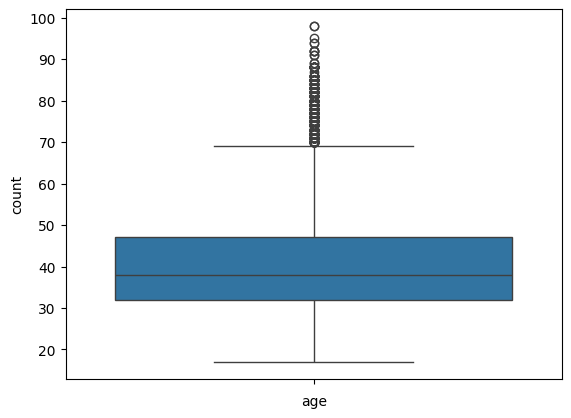

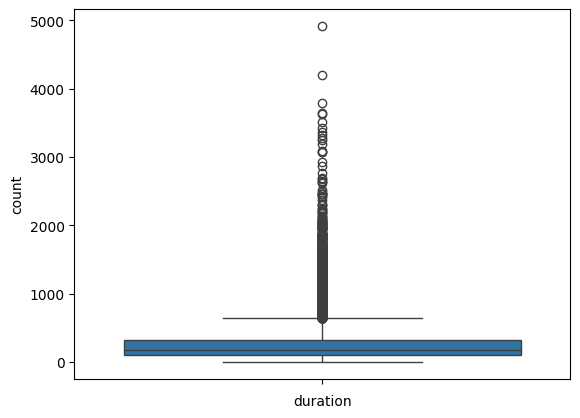

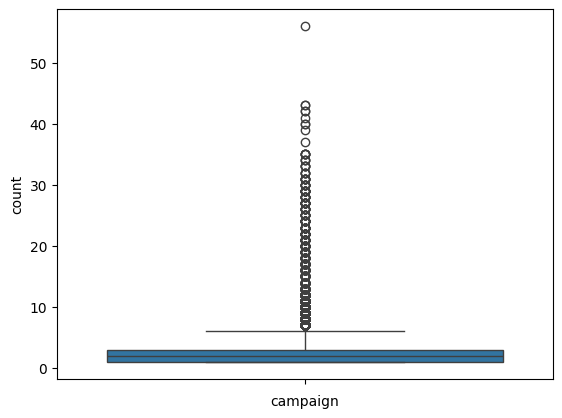

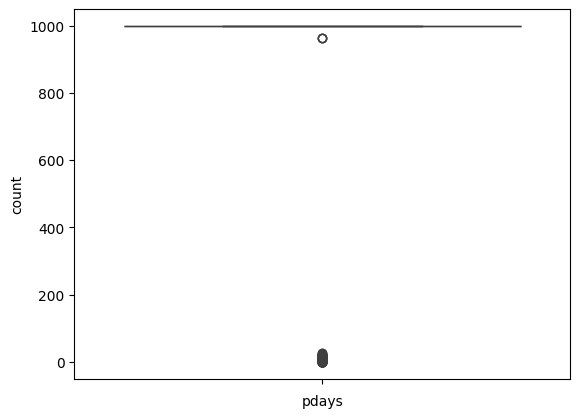

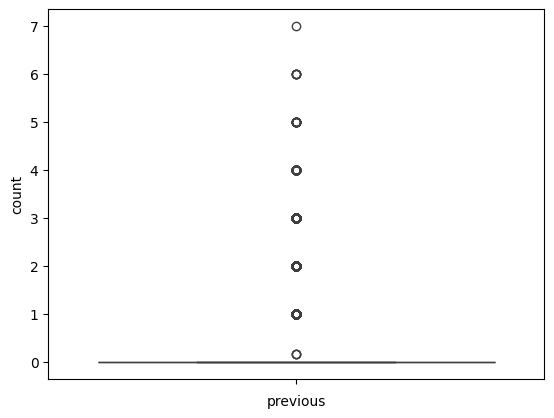

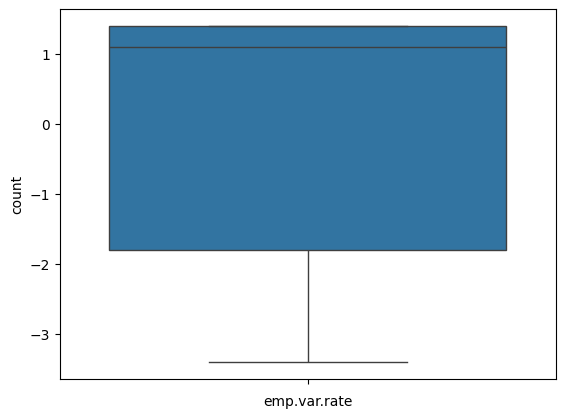

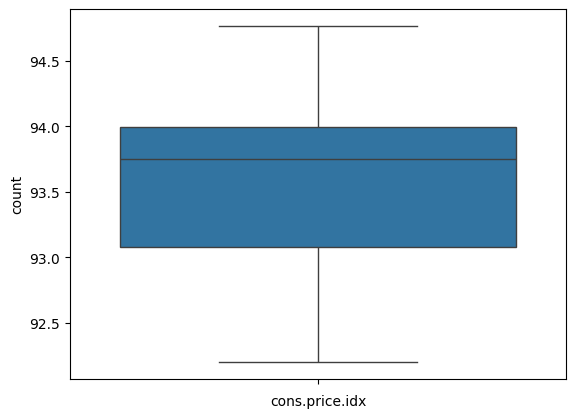

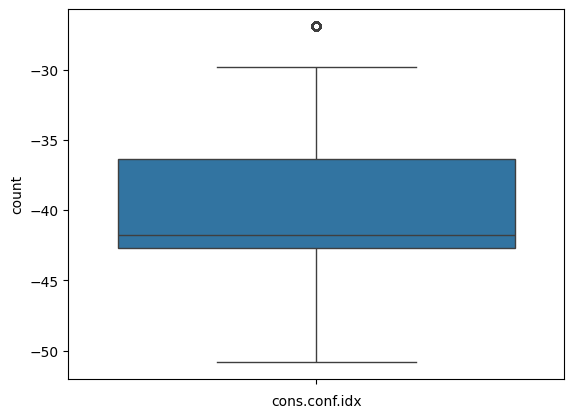

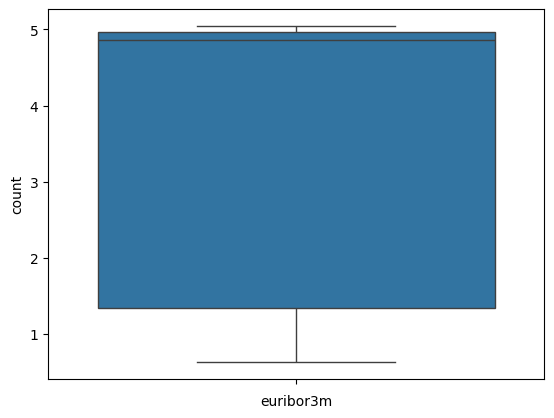

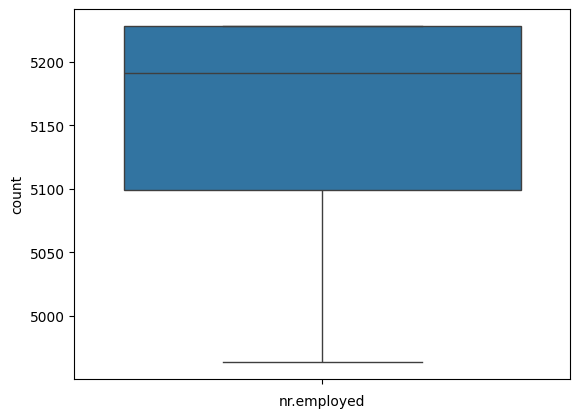

In [15]:
#Outlier detection
#Box plot

for col_name in col_list:
    if((data[col_name].dtypes=='int64') or (data[col_name].dtypes=='float64')):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [17]:
outliers_col = ['age', 'duration', 'campaign', "cons.conf.idx"]

for col in outliers_col:

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3-Q1

    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR

    data = data[(data[col]>=lower) & (data[col]<= upper)]

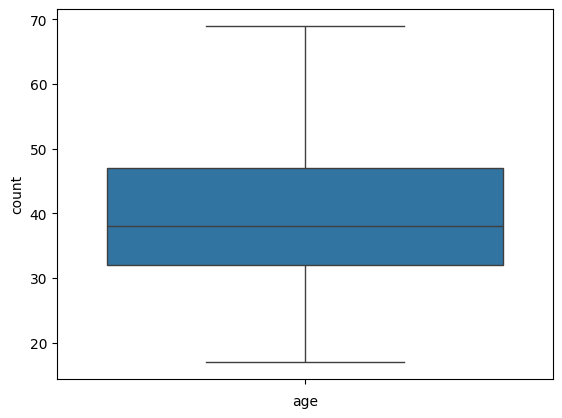

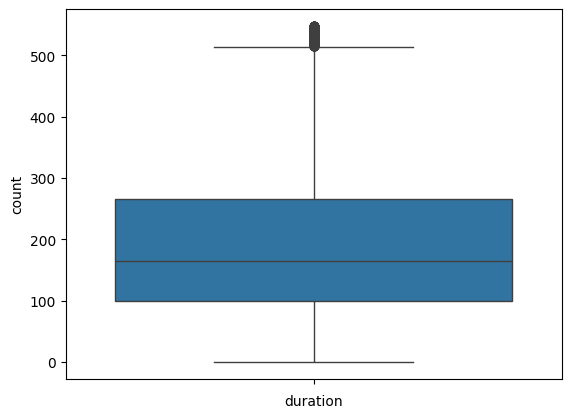

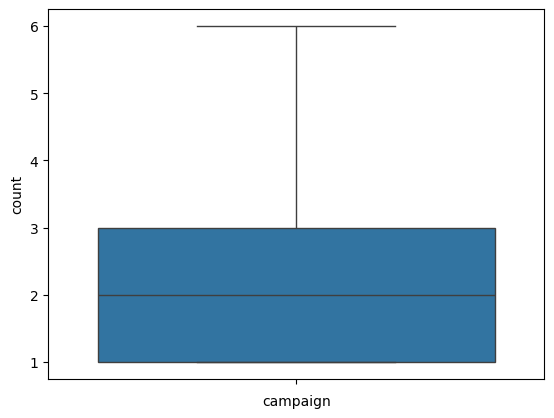

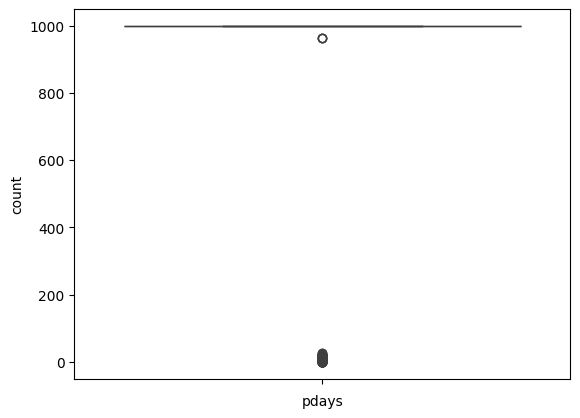

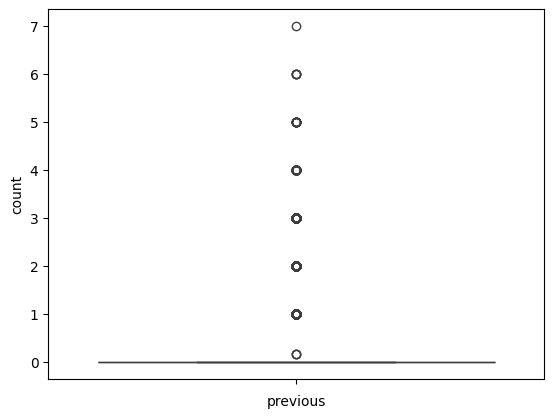

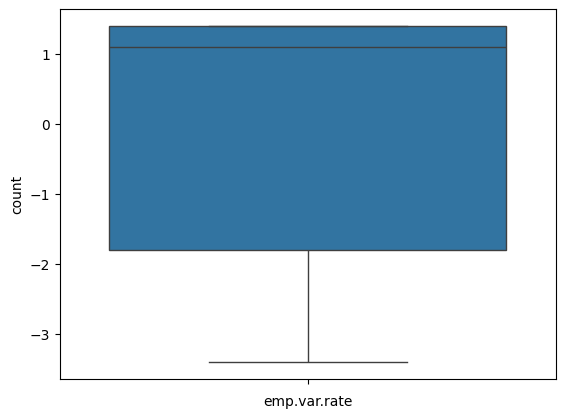

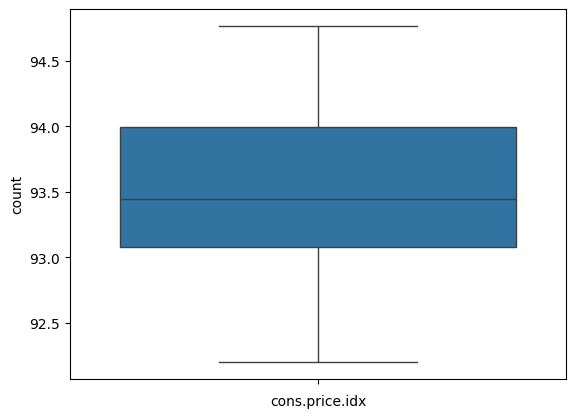

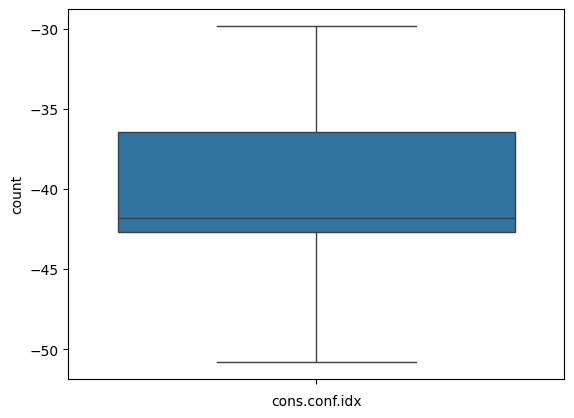

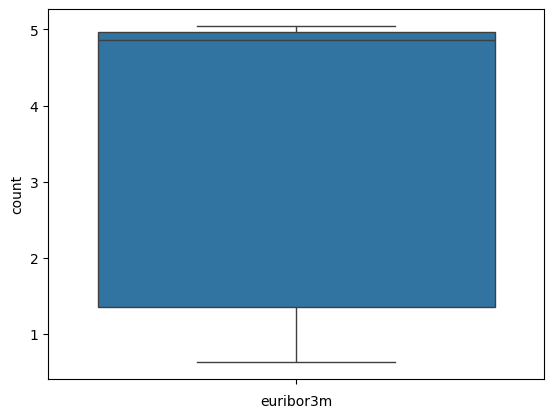

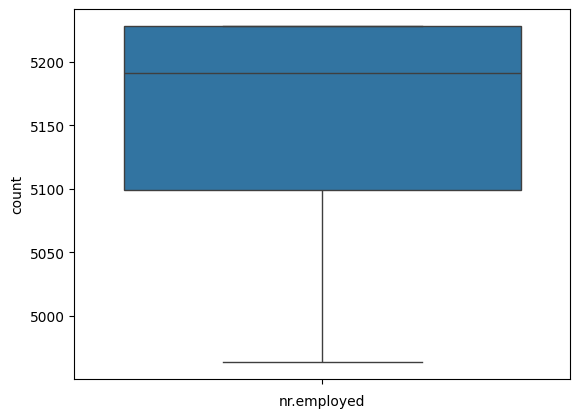

In [18]:
#Outlier detection
#Box plot

for col_name in col_list:
    if((data[col_name].dtypes=='int64') or (data[col_name].dtypes=='float64')):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34066 entries, 0 to 41197
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             34066 non-null  float64
 1   job             34066 non-null  object 
 2   marital         34066 non-null  object 
 3   education       34066 non-null  object 
 4   default         34066 non-null  object 
 5   housing         34066 non-null  object 
 6   loan            34066 non-null  object 
 7   contact         34066 non-null  object 
 8   month           34066 non-null  object 
 9   day_of_week     34066 non-null  object 
 10  duration        34066 non-null  float64
 11  campaign        34066 non-null  float64
 12  pdays           34066 non-null  float64
 13  previous        34066 non-null  float64
 14  poutcome        34066 non-null  object 
 15  emp.var.rate    34066 non-null  float64
 16  cons.price.idx  34066 non-null  float64
 17  cons.conf.idx   34066 non-null  floa

In [20]:
col_list

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
#age

#data["age"]=labelencoder.fit_transform(data["age"])

## 4. Data preprocessing

Steps:
- Handle missing values (if any)
- Encode categorical variables using one-hot encoding
- Split data into train and test sets



In [21]:
#Label encoding - to convert the categorical values to numerical values

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in col_list:
    if (data[i].dtypes == 'object'):

        data[i]=labelencoder.fit_transform(data[i])

In [22]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
#Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,22.143920
1,job,2.100664
2,marital,5.681772
3,education,4.565951
4,default,1.409350
5,housing,2.215463
6,loan,1.208741
7,contact,2.448706
8,month,5.799223
9,day_of_week,3.098669


In [26]:
data=data.drop(['nr.employed'], axis = 1)


KeyError: "['nr.employed'] not found in axis"

In [28]:
#Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,22.143920
1,job,2.100664
2,marital,5.681772
3,education,4.565951
4,default,1.409350
5,housing,2.215463
6,loan,1.208741
7,contact,2.448706
8,month,5.799223
9,day_of_week,3.098669


In [29]:
data=data.drop(['cons.price.idx'], axis = 1)

In [30]:
data=data.drop(['pdays'], axis = 1)
data=data.drop(['euribor3m'], axis = 1)
data=data.drop(['cons.conf.idx'], axis = 1)
data=data.drop(['age'], axis = 1)
data=data.drop(['poutcome'], axis = 1)

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,job,2.034200
1,marital,4.141718
2,education,3.803937
3,default,1.315338
4,housing,2.086037
5,loan,1.199468
6,contact,2.232640
7,month,4.508499
8,day_of_week,2.808282
9,duration,3.066745


In [33]:
X

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
0,3,1,0,0,0,0,1,6,1,261.000000,1.000000,0.000000,1.100000
1,7,1,3,1,0,0,1,6,1,149.000000,1.000000,0.000000,1.100000
2,7,1,3,0,2,0,1,6,1,226.000000,1.000000,0.000000,1.100000
3,0,1,1,0,0,0,1,6,1,151.000000,1.000000,0.000000,1.100000
4,7,1,3,0,0,2,1,6,1,307.000000,1.000000,0.000000,1.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41186,9,1,5,0,0,0,0,7,0,442.000000,1.000000,0.000000,-1.100000
41188,0,1,6,0,2,0,0,6,2,258.281265,2.567676,0.173124,0.081656
41189,5,1,5,0,2,0,0,7,0,239.000000,3.000000,1.000000,-1.100000
41191,0,1,6,0,2,0,0,6,2,258.281265,2.567676,0.173124,0.081656


In [34]:
y = pd.DataFrame(data['y'])

In [35]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
41186,yes
41188,no
41189,no
41191,no


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=898)

## 5. Model training – Logistic Regression

We train a Logistic Regression model on the processed features and analyze coefficients.


In [37]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [47]:
test_pred = logisticRegr.predict(x_test)

In [40]:
test_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [41]:
y_test

,y
4109,no
13332,no
26729,no
27610,no
5451,no
...,...
4089,no
35213,no
21697,no
16378,no


## 6. Model evaluation

We evaluate the model using:
- Accuracy
- Confusion Matrix
- Classification Report (Precision, Recall, F1-score)


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate features and target
X = data.drop('y', axis=1)
y = data['y'].map({'no': 0, 'yes': 1})  # encode target

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling (optional but good for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9291165248018785

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      6337
           1       0.49      0.22      0.30       477

    accuracy                           0.93      6814
   macro avg       0.71      0.60      0.63      6814
weighted avg       0.91      0.93      0.92      6814



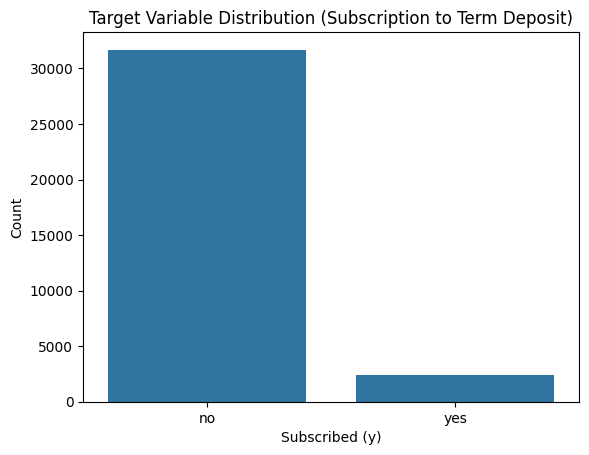

,proportion
y,
no,0.929989
yes,0.070011


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='y', data=data)
plt.title('Target Variable Distribution (Subscription to Term Deposit)')
plt.xlabel('Subscribed (y)')
plt.ylabel('Count')
plt.show()

data['y'].value_counts(normalize=True)


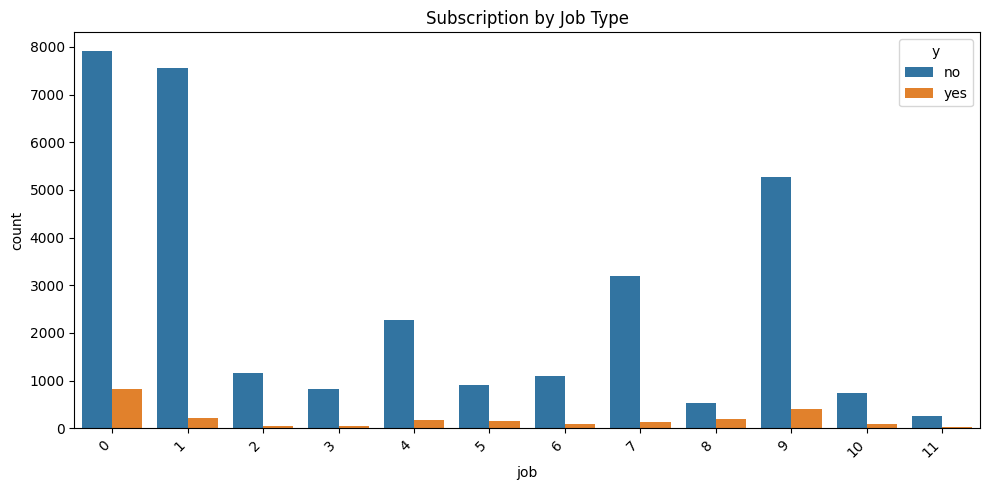

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(x='job', hue='y', data=data)
plt.xticks(rotation=45, ha='right')
plt.title('Subscription by Job Type')
plt.tight_layout()
plt.show()
